In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, preprocessing, optimizers
from keras.datasets import mnist

from keras.utils.np_utils import to_categorical

In [54]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [55]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


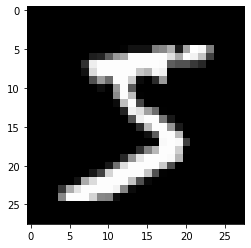

In [56]:
plt.imshow(X_train[0],cmap='gray')

In [57]:
y_train[0]

5

In [58]:
X_train = X_train.reshape(60000,28,28,1)

X_test = X_test.reshape(10000,28,28,1)

In [59]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [60]:
#scale the image

X_train /= 255.0
X_test /= 255.0

In [61]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [62]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [63]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(32,(5,5), input_shape = (28,28,1),padding='same',activation='relu'))
cnn.add(layers.MaxPool2D(2,2))

'''cnn.add(layers.Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(layers.MaxPool2D(2,2))'''

cnn.add(layers.Flatten())

cnn.add(layers.Dense(512, activation ='relu'))
cnn.add(layers.Dense(512, activation ='relu'))
cnn.add(layers.Dense(10,activation='softmax'))

In [64]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 3,480,394
Trainable params: 3,480,394
Non-trainable params: 0
____________________________________________

In [65]:
mdl_hist = cnn.fit(X_train,y_train_cat,epochs=10,validation_data=(X_test,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.1244 - accuracy: 0.9606 - val_loss: 0.0526 - val_accuracy: 0.9828
Epoch 2/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0432 - accuracy: 0.9867 - val_loss: 0.0517 - val_accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0377 - val_accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 0.0558 - val_accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0154 - accuracy: 0.9956 - val_loss: 0.0445 - val_accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.0445 - val_accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0095 - accuracy: 0.9975 - val_loss: 0

In [68]:
mdl_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

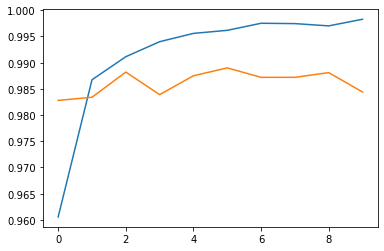

In [71]:
plt.plot(mdl_hist.history['accuracy'])
plt.plot(mdl_hist.history['val_accuracy'])
plt.show()